In [1]:
# simple forward Euler solver for the 1D heat equation
#   u_t = kappa u_xx  0<x<L, 0<t<T
# with zero-temperature boundary conditions
#   u=0 at x=0,L, t>0
# and prescribed initial temperature
#   u=u_I(x) 0<=x<=L,t=0

In [2]:
import numpy as np
import pylab as pl
from math import pi
from scipy.sparse import diags

In [ ]:
# Set problem parameters/functions
kappa = 1.0  # diffusion constant
L=1.0         # length of spatial domain
T=0.5       # total time to solve for

In [ ]:
def u_I(x):
    # initial temperature distribution
    y = np.sin(pi*x/L)
    return y

In [ ]:
# change the initial condition — for example, to u(x, 0) = sinp(πx) for some integer p
p = 2
def u_I2(x):
    #initial temperature distribution
    y = (np.sin(pi*x))**p
    return y

In [ ]:
def u_exact(x,t):
    # the exact solution
    y = np.exp(-kappa*(pi**2/L**2)*t)*np.sin(pi*x/L)+ 0.7*t
    return y

In [ ]:
# Set problem parameters/functions
kappa = 3.0  # diffusion constant
L=2.0         # length of spatial domain
T=0.5 

In [ ]:
def u_exact1(x,t):
    # the exact solution
    y = 100 - 50*x - (100/pi)*(np.exp(-3*t*pi**2)*np.sin(pi*x))
    return y

In [ ]:
def u_I1(x):
    # initial temperature distribution
    y = 50
    return y

In [ ]:
def u_exact2(x,t):
    # the exact solution
    y = 47.0449*np.exp(-0.0210*t)*np.sin(0.7249*x) + 45.1413*np.exp(-0.1113*t)*np.sin(1.6679*x)
    return y

In [ ]:
def u_I2(x):
    # initial temperature distribution
    y = 100*(1 - (x/3))
    return y

In [ ]:
# Set problem parameters/functions
kappa = 1/25  # diffusion constant
L=3.0         # length of spatial domain
T=0.5 

In [ ]:
# differentiated version of u
def u_diff(x,t):
    dudx = (pi*np.exp(-kappa*(pi**2/L**2)*t)*np.cos(pi*x/L))/L
    return dudx
   

In [12]:
# Set numerical parameters
mx = 10  # number of gridpoints in space
mt = 1000  # number of gridpoints in time

In [ ]:
# Set up the numerical environment variables
x = np.linspace(0, L, mx+1)     # mesh points in space
t = np.linspace(0, T, mt+1)     # mesh points in time
deltax = x[1] - x[0]            # gridspacing in x
deltat = t[1] - t[0]            # gridspacing in t
lmbda = kappa*deltat/(deltax**2)    # mesh fourier number
print("deltax=",deltax)
print("deltat=",deltat)
print("lambda=",lmbda)

In [ ]:
# Set up the solution variables
u_j = np.zeros(x.size)        # u at current time step
u_jp1 = np.zeros(x.size)      # u at next time step

In [ ]:
# Set initial condition
for i in range(0, mx+1):
    u_j[i] = u_I(x[i])

In [ ]:
# Set initial condition
for i in range(0, mx+1):
    u_j[i] = u_I1(x[i])

In [ ]:
# non-homogenous Dirichlet boundary condition
def p(t):
    return 100

def q(t):
    return 0
    

In [ ]:
# neumann boundary conditions
def P(t):
    return u_diff(0,t)

def Q(t):
    return u_diff(L,t)

In [ ]:
def u_I(x):
    # initial temperature distribution
    y = np.sin(pi*x/L)
    return y

In [ ]:
# function to solve PDE using euler method
def PDE_solve_euler(mt,mx,boundary_condition, initial_condition):
    u_j = np.zeros(x.size)        # u at current time step
    u_jp1 = np.zeros(x.size)      # u at next time step
    # u at next time step
    # Set initial condition
    for i in range(0, mx+1):
        u_j[i] = initial_condition(x[i])
    u_jp1 = np.zeros((mx+1,1))
    k = [lmbda*np.ones(mx-2),(1-2*lmbda)*np.ones(mx-1),lmbda*np.ones(mx-2)]
    offset = [-1,0,1]
    A = diags(k,offset).toarray()


    for j in range(0, mt):
        u_jp1[1:-1] = np.matmul(A , u_j[1:-1]).reshape(9,1)
        u_j = u_jp1
    
    return u_j

In [ ]:
# function to solve PDE using euler method
def PDE_solve_euler_1(mt,mx,boundary_condition, initial_condition):
    # u at next time step
    # Set initial condition
    for i in range(0, mx+1):
        u_j[i] = initial_condition(x[i])
    
    for j in range(0, mt):
    # Forward Euler timestep at inner mesh points
    # PDE discretised at position x[i], time t[j]
        for i in range(1, mx):
            u_jp1[i] = u_j[i] + lmbda*(u_j[i-1] - 2*u_j[i] + u_j[i+1])
        # Boundary conditions
        u_jp1[0] = boundary_condition[0]; u_jp1[mx] = boundary_condition[1]
        u_j[:] = u_jp1[:]
    return u_j

In [ ]:
# Plot the final result and exact solution for forward euler
pl.plot(x,PDE_solve_euler(1000,10,[0,0],u_I),'ro',label='num')
#xx = np.linspace(0,L,250)
#pl.plot(xx,u_exact(xx,T),'b-',label='exact')
pl.xlabel('x')
pl.ylabel('u(x,0.5)')
pl.legend(loc='upper right')
pl.show

In [ ]:
# Solve the PDE: loop over all time points using forward euler
for j in range(0, mt):
    # Forward Euler timestep at inner mesh points
    # PDE discretised at position x[i], time t[j]
    for i in range(1, mx):
        u_jp1[i] = u_j[i] + lmbda*(u_j[i-1] - 2*u_j[i] + u_j[i+1])
        
        # added equations for Dirichlet boundary condition
        #u_jp1[1] = u_j[1] + lmbda*(-2*u_j[1] + u_j[2]) + lmbda*p(t[j])
        #u_jp1[mx-1] = u_j[mx-1] + lmbda*(u_j[mx-2] - 2*u_j[mx-1]) + lmbda*q(t[j])
        
        # added equations for Neumann boundary condition
        #u_jp1[0] = u_j[0] + lmbda*(-2*u_j[0] + 2*u_j[1]) -2*lmbda*deltax*P(t[j])
        #u_jp1[mx] = u_j[mx] + lmbda*(2*u_j[mx-1] - 2*u_j[mx]) + 2*lmbda*deltax*Q(t[j])
        
        
    # Boundary conditions
    u_jp1[0] = 0; u_jp1[mx] = 0
    
    # Boundary conditions for Neumann
    
    
    # Boundary conditions for dirichlet
    #u_jp1[0] = p(t[j+1]); u_jp1[mx] = q(t[j+1])
    
    # Save u_j at time t[j+1]
    u_j[:] = u_jp1[:]

In [ ]:
# Plot the final result and exact solution for forward euler
pl.plot(x,u_j,'ro',label='num')
xx = np.linspace(0,L,250)
pl.plot(xx,u_exact(xx,T),'b-',label='exact')
pl.xlabel('x')
pl.ylabel('u(x,0.5)')
pl.legend(loc='upper right')
pl.show

In [ ]:
# The forward euler is unstable when lambda > 1/2 

In [ ]:
# steady state of the PDE problem is zero

In [ ]:
# plot in 3d (not sure if this is working currently)
# Data for three-dimensional scattered points
#import matplotlib.pyplot as plt
#ax = plt.axes(projection='3d')
#ax.scatter3D(xx,u_exact(xx,t), t, cmap='greens',label='exact');
#ax.scatter3D(x,u_j,mt, cmap='greens', label='num');
#ax.xlabel('x')
#ax.ylabel('u(x,0.5)')
#ax.zlabel('t')

#ax.set_xlabel('x')
#ax.set_ylabel('u(x,0.5)')
#ax.set_zlabel('t')
#ax.legend(loc='upper right')
#plt.show


In [ ]:
# neumann boundary condition matrix form using forward euler
u_jp1 = np.zeros((mx+1,1))
k = [lmbda*np.ones(mx),(1-2*lmbda)*np.ones(mx+1),lmbda*np.ones(mx)]
offset = [-1,0,1]
A = diags(k,offset).toarray()
A[0,1] = 2*lmbda
A[-1,-2] = 2*lmbda
s = np.zeros((mx+1,1))
print(A)

for j in range(0, mt): 
    s[0] = -P(t[j])
    s[-1] = Q(t[j])

    u_jp1 = np.matmul(A , u_j).reshape(11,1) + 2*lmbda*deltax*s
    u_j = u_jp1
    
    
# Plot the final result and exact solution for forward euler
pl.plot(x,u_j,'ro',label='num')
xx = np.linspace(0,L,250)
pl.plot(xx,u_exact(xx,T),'b-',label='exact')
pl.xlabel('x')
pl.ylabel('u(x,0.5)')
pl.legend(loc='upper right')
pl.show

In [ ]:
# dirichlet boundary condition matrix form using forward euler
u_jp1 = np.zeros((mx+1,1))
k = [lmbda*np.ones(mx-2),(1-2*lmbda)*np.ones(mx-1),lmbda*np.ones(mx-2)]
offset = [-1,0,1]
A = diags(k,offset, shape=(mx-1, mx-1)).toarray()
s = np.zeros((mx-1,1))


for j in range(0, mt):
    s[0] = p(t[j])
    s[-1] = q(t[j])
    
    
    u_jp1[1:-1] = np.matmul(A , u_j[1:-1]).reshape(9,1) + lmbda*s
    
    u_jp1[0] = p(t[j+1]); u_jp1[mx] = q(t[j+1])
    
    u_j = u_jp1
    
    
# Plot the final result and exact solution for forward euler
pl.plot(x,u_j,'ro',label='num')
xx = np.linspace(0,L,250)
pl.plot(xx,u_exact1(xx,T),'b-',label='exact')
pl.xlabel('x')
pl.ylabel('u(x,0.5)')
pl.legend(loc='upper right')
pl.show
 

In [ ]:
# dirichlet boundary condition matrix form using forward euler
u_jp1 = np.zeros((mx+1,1))
k = [lmbda*np.ones(mx-2),(1-2*lmbda)*np.ones(mx-1),lmbda*np.ones(mx-2)]
offset = [-1,0,1]
A = diags(k,offset).toarray()

s = np.zeros((mx-1,1))

A[-1,0] = lmbda
A[0,-1] = lmbda
print(A)
print(mx)

In [ ]:
# adding rhs function
# Set up the solution variables
u_j = np.zeros(x.size)        # u at current time step
u_jp1 = np.zeros(x.size)      # u at next time step
F_j = lambda x,t: 8*t + x

k = [lmbda*np.ones(mx),(1-2*lmbda)*np.ones(mx+1),lmbda*np.ones(mx)]
offset = [-1,0,1]
A = diags(k,offset).toarray()
# u at next time step
# Set initial condition
for i in range(0, mx+1):
    u_j[i] = u_I(x[i])

for j in range(0, mt):
    u_jp1 = np.matmul(A , u_j) + deltat*F_j(x,t[j])
    #u_jp2 = np.matmul(A,u_j)
    #u_jp3 = deltat*F_j(x,t[j])
    u_j = u_jp1
    
pl.plot(x ,u_j,'ro',label='num')
xx = np.linspace(0,L,250)
pl.plot(xx,u_exact(xx,T),'b-',label='exact')
pl.xlabel('x')
pl.ylabel('u(x,0.5)')
pl.legend(loc='upper right')
pl.show

In [ ]:
# experiment - periodic boundary (unsure if it works)

#u_j = np.zeros(mx) 
u_j = np.zeros(mx)    
# Set initial condition
for i in range(0, mx):
    u_j[i] = u_I(x[i])
u_jp1 = np.zeros((mx+1,1))
k = [lmbda*np.ones(mx-1),(1-2*lmbda)*np.ones(mx),lmbda*np.ones(mx-1)]
offset = [-1,0,1]
A = diags(k,offset).toarray()
A[-1,0] = lmbda
A[0,-1] = lmbda



for j in range(0, mt):
    u_jp1 = np.matmul(A , u_j)
    u_j = u_jp1
print(u_j)

x = np.linspace(0, L, mx)
pl.plot(x ,u_j,'ro',label='num')
xx = np.linspace(0,L,250)
pl.plot(xx,u_exact(xx,T),'b-',label='exact')
pl.xlabel('x')
pl.ylabel('u(x,0.5)')
pl.legend(loc='upper right')
pl.show
 

In [7]:
# function to solve PDE using euler method
def PDE_solve_euler(initial_condition, args=(), boundary_condition=None):
    
    """
    A function that the euler method to solve the 1D heat equation.

    Parameters
    ----------
     
    initial_condition:
     
    args: 
     
    boundary_condition:
       

    Returns
    -------
   
    """
    mt = 1000
    mx = 10
    
    u_j = np.zeros(x.size)        # u at current time step
    u_jp1 = np.zeros((mx+1,1))
    k = [lmbda*np.ones(mx-2),(1-2*lmbda)*np.ones(mx-1),lmbda*np.ones(mx-2)]
    offset = [-1,0,1]
    A = diags(k,offset,shape=(mx-1, mx-1)).toarray()

    if boundary_condition == 'periodic':
        u_j = np.zeros(mx)
        k = [lmbda*np.ones(mx-1),(1-2*lmbda)*np.ones(mx),lmbda*np.ones(mx-1)]
        offset = [-1,0,1]
        A = diags(k,offset).toarray()
        A[-1,0] = lmbda
        A[0,-1] = lmbda
        for i in range(0, mx):
            u_j[i] = initial_condition(x[i])
        for j in range(0, mt):
            u_j = periodic_boundary(A, u_j)
        print(u_j)
    
    elif boundary_condition == 'rhs':
 
        u_jp1 = np.zeros(x.size)  
    
        F_j = args

        k = [lmbda*np.ones(mx),(1-2*lmbda)*np.ones(mx+1),lmbda*np.ones(mx)]
        offset = [-1,0,1]
        A = diags(k,offset).toarray()
        
        for i in range(0, mx+1):
            u_j[i] = initial_condition(x[i])

        for j in range(0, mt):
            u_j = rhs_function(A, u_j,F_j,u_jp1,j)

    
    else:

        for i in range(0, mx+1):
            u_j[i] = initial_condition(x[i])
    
  
        for j in range(0, mt):
            if boundary_condition == 'dirichlet':
               # s = np.zeros((mx-1,1))
                p = args[0]
                q = args[1]
                s = np.zeros((mx-1,1))
                s[0] = p(t[j])
                s[-1] = q(t[j])
                #u_j = dirichlet(A,s,u_j,u_jp1)
                u_j = dirichlet_boundary(A, u_j,j,s,u_jp1,args=args)
            
            
            elif boundary_condition== 'neumann':
                k = [lmbda*np.ones(mx),(1-2*lmbda)*np.ones(mx+1),lmbda*np.ones(mx)]
                offset = [-1,0,1]
                A = diags(k,offset).toarray()
                A[0,1] = 2*lmbda
                A[-1,-2] = 2*lmbda
                s = np.zeros((mx+1,1))
                
                P = args[0]
                Q = args[1]
                s[0] = -P(t[j])
                s[-1] = Q(t[j])
                u_j = Neumann_boundary(A,s,u_j,args=args)
            
            elif boundary_condition == None:
                u_jp1[1:-1] = np.matmul(A , u_j[1:-1]).reshape(9,1)
                u_j = u_jp1
    
        return u_j
    return u_j

In [ ]:
# Plot the final result and exact solution for forward euler
#pl.plot(x,PDE_solve_euler(1000,10,[0,0],u_I,args=(lambda t:u_diff(0,t),lambda t:u_diff(L,t)),dirichlet=None,neumann=None,periodic=None, rhs=rhs_function),'ro',label='num')
x = np.linspace(0, L, mx+1)
pl.plot(x,PDE_solve_euler(u_I1, args=(lambda t:100,lambda t:0), boundary_condition = 'dirichlet'),'ro',label='num')
xx = np.linspace(0,L,250)
pl.plot(xx,u_exact1(xx,T),'b-',label='exact')
pl.xlabel('x')
pl.ylabel('u(x,0.5)')
pl.legend(loc='upper right')
pl.show
 

In [13]:
# Set problem parameters/functions
kappa = 1.0  # diffusion constant
L=2.0         # length of spatial domain
T=0.5       # total time to solve for

In [14]:
# Set up the numerical environment variables
x = np.linspace(0, L, mx+1)     # mesh points in space
t = np.linspace(0, T, mt+1)     # mesh points in time
deltax = x[1] - x[0]            # gridspacing in x
deltat = t[1] - t[0]            # gridspacing in t
lmbda = kappa*deltat/(deltax**2)    # mesh fourier number

In [15]:
def u_I3(x):
    # initial temperature distribution
    y = 5*np.sin(x)
    return y

In [16]:
def u_exact3(x,t):
    # the exact solution
    y = 0.5*(5*(1-np.cos(2))) - ((20*np.cos(2) + 20)/(-4 + pi**2))*np.exp(-(pi**2)*t/2**2)*np.cos(pi*x/2)
    return y

<function matplotlib.pyplot.show(close=None, block=None)>

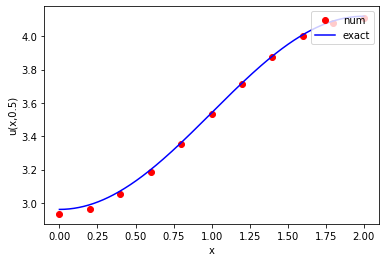

In [17]:
# Plot the final result and exact solution for forward euler
#pl.plot(x,PDE_solve_euler(1000,10,[0,0],u_I,args=(lambda t:u_diff(0,t),lambda t:u_diff(L,t)),dirichlet=None,neumann=None,periodic=None, rhs=rhs_function),'ro',label='num')
x = np.linspace(0, L, mx+1)
pl.plot(x,PDE_solve_euler(u_I3, args=(lambda t:0, lambda t:0), boundary_condition = 'neumann'),'ro',label='num')
xx = np.linspace(0,L,250)
pl.plot(xx,u_exact3(xx,T),'b-',label='exact')
pl.xlabel('x')
pl.ylabel('u(x,0.5)')
pl.legend(loc='upper right')
pl.show
 

In [18]:
# Set problem parameters/functions
kappa = 9.0  # diffusion constant
L=2.0         # length of spatial domain
T=0.5       # total time to solve for

In [19]:
# Set up the numerical environment variables
x = np.linspace(0, L, mx+1)     # mesh points in space
t = np.linspace(0, T, mt+1)     # mesh points in time
deltax = x[1] - x[0]            # gridspacing in x
deltat = t[1] - t[0]            # gridspacing in t
lmbda = kappa*deltat/(deltax**2)    # mesh fourier number

In [20]:
def u_I4(x):
    # initial temperature distribution
    y = 2*x**2
    return y

In [21]:
def u_exact4(x,t):
    # the exact solution
    y = 4*x - ((64/pi**3)*np.exp(t*(-9/4)*pi**2)*np.sin(pi*x/2))
    return y

<function matplotlib.pyplot.show(close=None, block=None)>

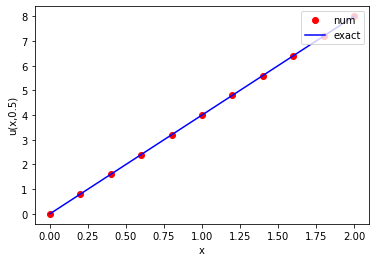

In [22]:
# Plot the final result and exact solution for forward euler
#pl.plot(x,PDE_solve_euler(1000,10,[0,0],u_I,args=(lambda t:u_diff(0,t),lambda t:u_diff(L,t)),dirichlet=None,neumann=None,periodic=None, rhs=rhs_function),'ro',label='num')
x = np.linspace(0, L, mx+1)
pl.plot(x,PDE_solve_euler(u_I4, args=(lambda t:0, lambda t:8), boundary_condition = 'dirichlet'),'ro',label='num')
xx = np.linspace(0,L,250)
pl.plot(xx,u_exact4(xx,T),'b-',label='exact')
pl.xlabel('x')
pl.ylabel('u(x,0.5)')
pl.legend(loc='upper right')
pl.show

In [23]:
# Set problem parameters/functions
kappa = 2.0  # diffusion constant
L=2.0         # length of spatial domain
T=0.5       # total time to solve for

In [24]:
# Set up the numerical environment variables
x = np.linspace(0, L, mx+1)     # mesh points in space
t = np.linspace(0, T, mt+1)     # mesh points in time
deltax = x[1] - x[0]            # gridspacing in x
deltat = t[1] - t[0]            # gridspacing in t
lmbda = kappa*deltat/(deltax**2)    # mesh fourier number

In [25]:
def u_I5(x):
    # initial temperature distribution
    y = np.sin(pi*x/L)
    return y

In [26]:
def u_exact5(x,t):
    # the exact solution
    y = np.exp(-2*((pi**2)/4))*np.sin(pi*x/2) + np.sin(pi*x/2)*(2/(pi**2) - 2*np.exp((-t*pi**2)/2)/pi**2)
    return y

<function matplotlib.pyplot.show(close=None, block=None)>

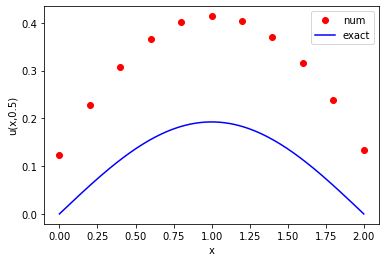

In [27]:
# Plot the final result and exact solution for forward euler
#pl.plot(x,PDE_solve_euler(1000,10,[0,0],u_I,args=(lambda t:u_diff(0,t),lambda t:u_diff(L,t)),dirichlet=None,neumann=None,periodic=None, rhs=rhs_function),'ro',label='num')
x = np.linspace(0, L, mx+1)
pl.plot(x,PDE_solve_euler(u_I5, args=(lambda x,t: np.cos(x) + t*x**2), boundary_condition = 'rhs'),'ro',label='num')
xx = np.linspace(0,L,250)
pl.plot(xx,u_exact5(xx,T),'b-',label='exact')
pl.xlabel('x')
pl.ylabel('u(x,0.5)')
pl.legend(loc='upper right')
pl.show

In [36]:
# Set problem parameters/functions
k = 2.0  # diffusion constant
L=1         # length of spatial domain
T=0.5       # total time to solve for

In [37]:
# Set up the numerical environment variables
x = np.linspace(0, L, mx+1)     # mesh points in space
t = np.linspace(0, T, mt+1)     # mesh points in time
deltax = x[1] - x[0]            # gridspacing in x
deltat = t[1] - t[0]            # gridspacing in t
lmbda = kappa*deltat/(deltax**2)    # mesh fourier number

In [38]:
def u_I6(x):
    # initial temperature distribution
    y = 4*np.sin(3*pi*x) + 9*np.sin(7*pi*x)
    return y

In [53]:
def u_exact6(x,t):
    # the exact solution
    y = 4*np.exp(-t*k*(3*pi)**2)*np.sin(3*pi*x) + (1/(25*k*pi**2))*np.exp(-t*k*(5*pi)**2)*np.sin(5*pi*x) + 9*np.exp(-t*(7*pi)**2)*np.sin(7*pi*x) + (1/(k*25*pi**2))*np.sin(5*pi*x)
    return y

<function matplotlib.pyplot.show(close=None, block=None)>

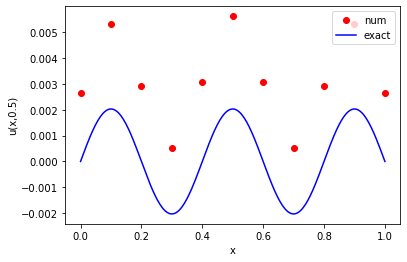

In [54]:
# Plot the final result and exact solution for forward euler
#pl.plot(x,PDE_solve_euler(1000,10,[0,0],u_I,args=(lambda t:u_diff(0,t),lambda t:u_diff(L,t)),dirichlet=None,neumann=None,periodic=None, rhs=rhs_function),'ro',label='num')
x = np.linspace(0, L, mx+1)
pl.plot(x,PDE_solve_euler(u_I6, args=(lambda x,t: np.sin(5*pi*x)), boundary_condition = 'rhs'),'ro',label='num')
xx = np.linspace(0,L,250)
pl.plot(xx,u_exact6(xx,T),'b-',label='exact')
pl.xlabel('x')
pl.ylabel('u(x,0.5)')
pl.legend(loc='upper right')
pl.show

In [ ]:
# plotting for periodic
x = np.linspace(0, L, mx)
pl.plot(x,PDE_solve_euler([0,0],u_I,args=(lambda x,t: 8*t + x),dirichlet=None,neumann=None,periodic=None, rhs=rhs_function),'ro',label='num')
xx = np.linspace(0,L,250)
#pl.plot(xx,u_exact(xx,T),'b-',label='exact')
pl.xlabel('x')
pl.ylabel('u(x,0.5)')
pl.legend(loc='upper right')
pl.show

In [3]:
def rhs_function(A, u_j,F_j,u_jp1,j):
    u_jp1 = np.matmul(A , u_j) + deltat*F_j(x,t[j])
    u_j = u_jp1
    return u_j
    

In [4]:
def periodic_boundary(A, u_j):
    u_jp1 = np.matmul(A , u_j)
    u_j = u_jp1
    return u_j

In [5]:
#def dirichlet_boundary(A,s,u_j,u_jp1):
def dirichlet_boundary(A, u_j,j,s,u_jp1,args):
    p= args[0] 
    q = args[1]                   
    u_jp1[1:-1] = np.matmul(A , u_j[1:-1]).reshape(9,1) + lmbda*s
    u_jp1[0] = p(t[j+1]); u_jp1[mx] = q(t[j+1])
    u_j = u_jp1
    return  u_j
    

In [6]:
def Neumann_boundary(A,s,u_j,args):
    P = args[0]
    Q = args[1]
    u_jp1 = np.matmul(A , u_j).reshape(11,1) + 2*lmbda*deltax*s
    u_j = u_jp1
    return u_j
    

In [ ]:
# function to solve PDE using backward euler method
def PDE_solve_back_euler(mt,mx,boundary_condition, initial_condition):
    u_j = np.zeros(x.size)        # u at current time step
    u_jp1 = np.zeros(x.size)      # u at next time step
    # u at next time step
    # Set initial condition
    for i in range(0, mx+1):
        u_j[i] = initial_condition(x[i])
    u_jp1 = np.zeros((mx+1,1))
    k = [-lmbda*np.ones(mx-2),(1+2*lmbda)*np.ones(mx-1),-lmbda*np.ones(mx-2)]
    offset = [-1,0,1]
    A_BE = diags(k,offset).toarray()
    
    for j in range(0, mt):
        u_jp1[1:-1] = np.linalg.solve(A_BE , u_j[1:-1]).reshape(9,1)
        u_j = u_jp1
    return u_j

In [ ]:
# function to solve PDE using euler method
def PDE_solve_crank(mt,mx,boundary_condition, initial_condition):
    u_j = np.zeros(x.size)        # u at current time step
    u_jp1 = np.zeros(x.size)      # u at next time step
    # u at next time step
    # Set initial condition
    for i in range(0, mx+1):
        u_j[i] = initial_condition(x[i])
    u_jp1 = np.zeros((mx+1,1))
    k = [(-lmbda/2)*np.ones(mx-2),(1+lmbda)*np.ones(mx-1),(-lmbda/2)*np.ones(mx-2)]
    f = [(lmbda/2)*np.ones(mx-2),(1-lmbda)*np.ones(mx-1),(lmbda/2)*np.ones(mx-2)]
    offset = [-1,0,1]
    A_CN = diags(k,offset).toarray()
    B_CN = diags(f,offset).toarray()
    for j in range(0, mt):
        b = np.matmul(B_CN , u_j[1:-1]).reshape(9,1)
        u_jp1[1:-1] = np.linalg.solve(A_CN,b)
        u_j = u_jp1
    return u_j

In [ ]:
# Plot the final result and exact solution for  back forward euler
pl.plot(x,PDE_solve_crank(1000,10,[0,0],u_I),'ro',label='num')
xx = np.linspace(0,L,250)
pl.plot(xx,u_exact(xx,T),'b-',label='exact')
pl.xlabel('x')
pl.ylabel('u(x,0.5)')
pl.legend(loc='upper right')
pl.show

In [ ]:
def finite_diff(kappa, L, T, method = 'Forward-Euler'):
    
    
    # Set numerical parameters
    mx = 10  # number of gridpoints in space
    mt = 1000  # number of gridpoints in time
    
    # Set up the numerical environment variables
    x = np.linspace(0, L, mx+1)     # mesh points in space
    t = np.linspace(0, T, mt+1)     # mesh points in time
    deltax = x[1] - x[0]            # gridspacing in x
    deltat = t[1] - t[0]            # gridspacing in t
    lmbda = kappa*deltat/(deltax**2)    # mesh fourier number

    
    # Set up the solution variables
    u_j = np.zeros(x.size)        # u at current time step
    u_jp1 = np.zeros(x.size)      # u at next time step
    
    # Set initial condition
    for i in range(0, mx+1):
        u_j[i] = u_I(x[i])
    
    if method == 'Forward-Euler':
        u_jp1 = np.zeros((mx+1,1))
        k = [lmbda*np.ones(mx-2),(1-2*lmbda)*np.ones(mx-1),lmbda*np.ones(mx-2)]
        offset = [-1,0,1]
        A = diags(k,offset).toarray()


        for j in range(0, mt):
            u_jp1[1:-1] = np.matmul(A , u_j[1:-1]).reshape(9,1)
            u_j = u_jp1
            
    elif method == 'Backward-Euler':
        u_jp1 = np.zeros((mx+1,1))
        k = [-lmbda*np.ones(mx-2),(1+2*lmbda)*np.ones(mx-1),-lmbda*np.ones(mx-2)]
        offset = [-1,0,1]
        A_BE = diags(k,offset).toarray()


        for j in range(0, mt):
            u_jp1[1:-1] = np.linalg.solve(A_BE , u_j[1:-1]).reshape(9,1)
            u_j = u_jp1
    
    elif method == 'Crank-Nicholson':
        u_jp1 = np.zeros((mx+1,1))
        k = [(-lmbda/2)*np.ones(mx-2),(1+lmbda)*np.ones(mx-1),(-lmbda/2)*np.ones(mx-2)]
        f = [(lmbda/2)*np.ones(mx-2),(1-lmbda)*np.ones(mx-1),(lmbda/2)*np.ones(mx-2)]
        offset = [-1,0,1]
        A_CN = diags(k,offset).toarray()
        B_CN = diags(f,offset).toarray()


        for j in range(0, mt):
            b = np.matmul(B_CN , u_j[1:-1]).reshape(9,1)
            u_jp1[1:-1] = np.linalg.solve(A_CN,b)
            u_j = u_jp1
            
    else:
        raise ValueError("Invalid method, please input 'Forward-Euler', 'Backward-Euler' or 'Crank-Nicholson'.")
        
        
    pl.plot(x,u_j,'ro',label='num')
    xx = np.linspace(0,L,250)
    pl.plot(xx,u_exact(xx,T),'b-',label='exact')
    pl.xlabel('x')
    pl.ylabel('u(x,0.5)')
    pl.legend(loc='upper right')
    pl.show
        
    return x, u_j

In [ ]:
finite_diff(1,1,0.5,method = 'Crank-Nicholson')

In [ ]:
# Adapt your numerical continuation code (from the ODEs part of the course) so that it can also
#track, under variations of a parameter in the system, steady-states of second-order diffusive PDEs.

In [ ]:
def Numerical_Continuation(initial_guess,start, end, h, fun='Hopf'):
    """
    A function that performs natural parameter continution for a system of
    2 ODE's. It increments the parameter beta (b) by a set amount and
    attempts to find the solution for the new parameter value using the 
    last found solution as an initial guess.

    Parameters
    ----------
    initial_guess : np.array
        The initial guess is an array of the initial guess values for the
        equations followed by a period.
        
    fun : function
        The ODE we wish to solve. The ode function should take
        a single parameter (the state vector) and return the
        right-hand side of the ODE as a numpy.array. Input 'Hopf'
        or 'mod_Hopf'.
    
    start:  value(int or float)
        The initial value for the parameter
    
    end: value(int or float)
        The end value for the parameter
    
    h: value(int or float)
        The step-size we wish to increment the parameter by. Note this
        value should be negative if the start value is positive and the 
        end value is negative

    Returns
    -------
    Returns a graph showing how the solution of the ODE/equations
    changes as the value of beta (b) is incremented from start to end value.
    """ 
    if fun == Hopf:
        title = 'the Hopf bifurcation normal form'
    elif fun == mod_Hopf:
        title = 'the modified Hopf bifurcation normal form'
    else:
        raise ValueError("Invalid function. Please specify 'Hopf' or 'mod_Hopf'")
        
        
        
    x = []
    y = []
    period = []
    for b in np.arange(start,end,h):
        root = fsolve(shooting,initial_guess,args = (fun, phase_condition_func, (b,s)))
        initial_guess = root
        x.append(root[0])
        y.append(root[1])
        period.append(root[2])
    
    fig=plt.figure(figsize=(8,6))   
    plt.xlabel('\u03B2')
    plt.ylabel('solution')
    plt.title(f'Natural parameter continuation of \u03B2 for the {title} equations')
    plot = plt.plot(np.arange(start,end,h), x)
    plot = plt.plot(np.arange(start,end,h), y)
    plot = plt.plot(np.arange(start,end,h), period)
    plt.legend(['x','y','period'], loc = "upper right")
    return 